In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
# Load dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({i: name for i, name in enumerate(iris.target_names)})

In [ ]:
print(df['species'])

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [ ]:
print("Tampilan awal data:")
print(df.head())

Tampilan awal data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [ ]:
print("\nInformasi variabel:")
df.info()


Informasi variabel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# **A. Exploratory Data Analysis**

In [ ]:
# Informasi Dataset
print("Jumlah data:", len(df))

Jumlah data: 150


In [ ]:
df.shape
print("Jumlah variabel:", df.shape[1])

Jumlah variabel: 5


In [ ]:
df.dtypes
print("\nTipe data tiap variabel:\n", df.dtypes)


Tipe data tiap variabel:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object


In [ ]:
df['species'].value_counts()
print("\nJumlah masing-masing spesies:\n", df['species'].value_counts())


Jumlah masing-masing spesies:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


## **Statistik Deskriptif**

In [ ]:
print("\nStatistik Deskriptif:\n", df.describe().loc[['mean', '50%', 'std', 'min', 'max']])


Statistik Deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean           5.843333          3.057333           3.758000          1.199333
50%            5.800000          3.000000           4.350000          1.300000
std            0.828066          0.435866           1.765298          0.762238
min            4.300000          2.000000           1.000000          0.100000
max            7.900000          4.400000           6.900000          2.500000


## **Visualisasi Distribusi**
### Histogram & Boxplot untuk variabel numerik

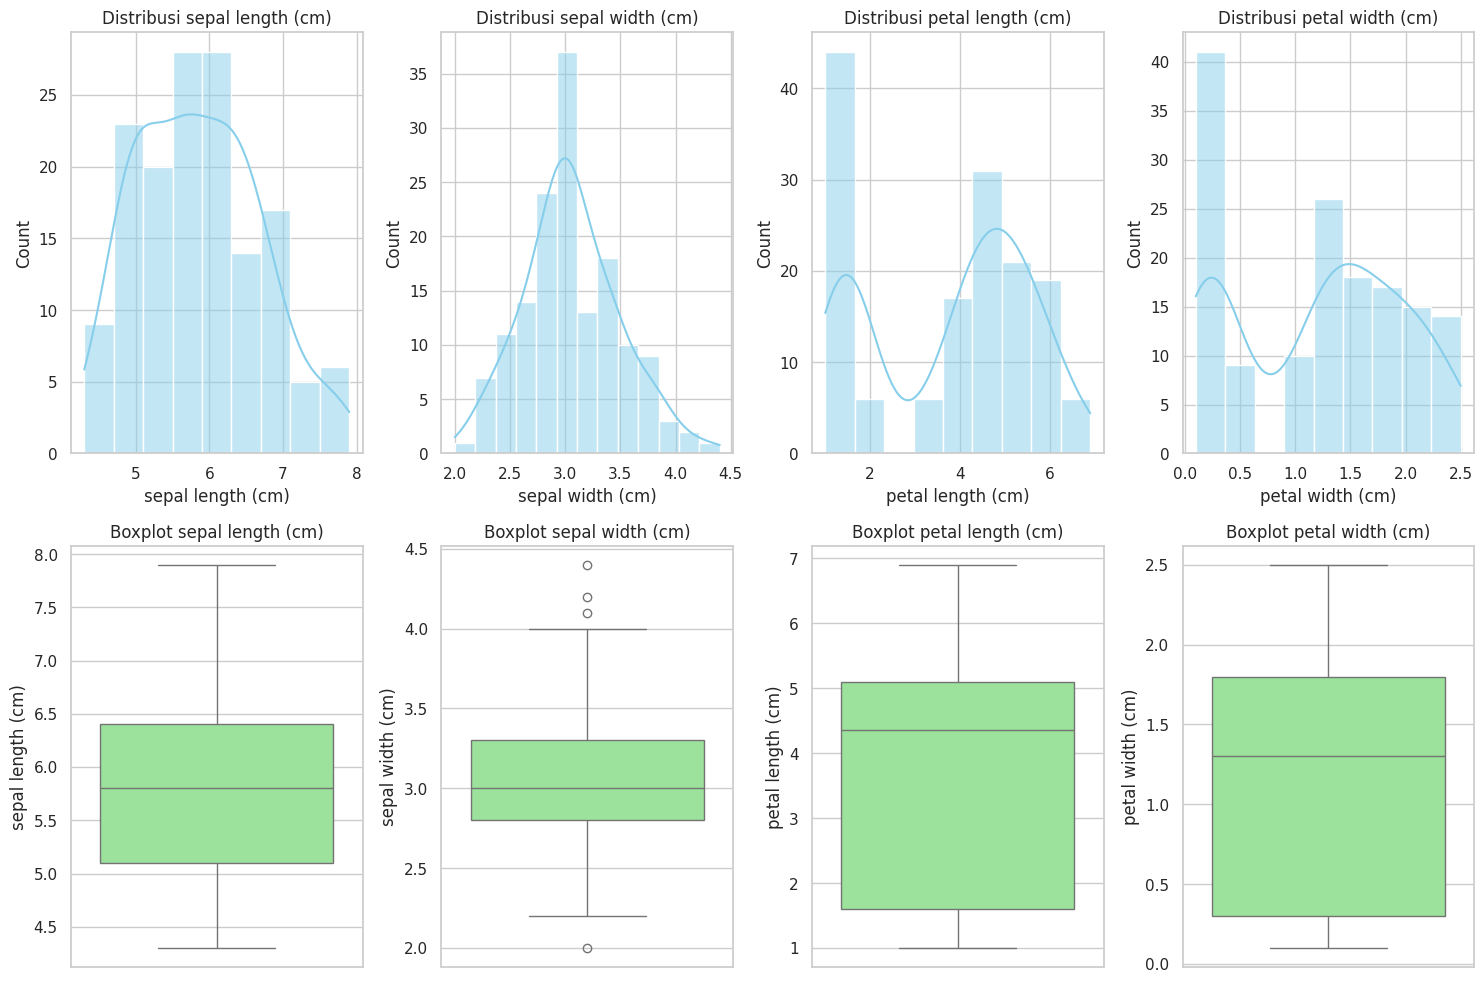

In [ ]:
ig, axes = plt.subplots(2, 4, figsize=(15, 10))
for i, col in enumerate(iris.feature_names):
    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Distribusi {col}')
    # Boxplot
    sns.boxplot(y=df[col], ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

/tmp/ipython-input-320/2951002798.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y='petal length (cm)', data=df, palette='muted')


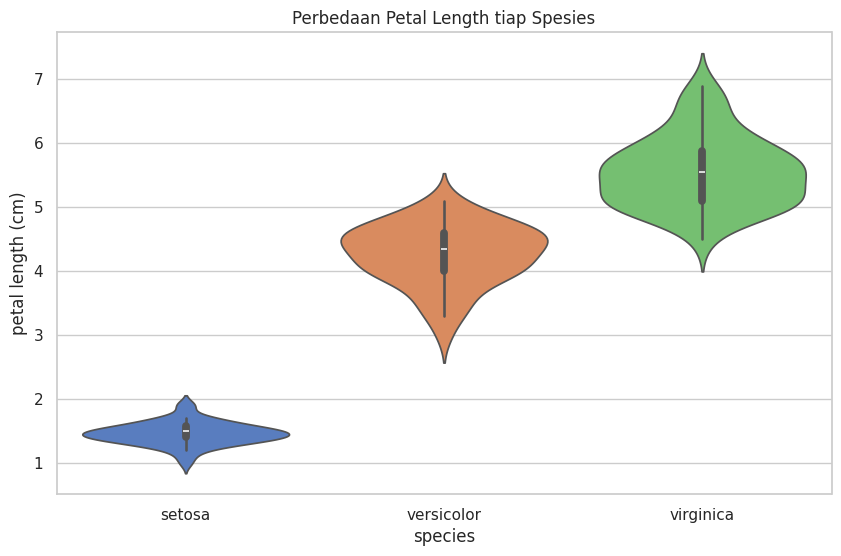

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='species', y='petal length (cm)', data=df, palette='muted')
plt.title('Perbedaan Petal Length tiap Spesies')
plt.show()

### **Berdasarkan visualisasi yang telah dibuat, perbedaan antar ketiga spesies Iris sangat terlihat jelas, terutama pada variabel kelopak (petal) :**

- **Iris Setosa**: Spesies ini adalah yang paling mudah dibedakan karena ukuran kelopaknya (panjang dan lebar) jauh lebih kecil dengan sebaran data yang sangat rapat, menandakan variasi antar individunya rendah.

- **Iris Versicolor**: Berada di posisi menengah. kelopaknya lebih besar dari Setosa tapi umumnya lebih kecil dari Virginica, meski ada sedikit tumpang tindih dengan Virginica di beberapa variabel

- **Iris Virginica**: Spesies ini memiliki ukuran kelopak paling besar dan panjang, serta secara statistik mencatat nilai rata-rata tertinggi di antara ketiganya. meski secara visual kadang mirip Versicolor, perbedaan rata-ratanya tetap jelas.

# **B. Sampling (Bootstrap)**

In [ ]:
target_var = 'petal length (cm)'
original_data = df[target_var]

In [ ]:
# Bootstrap Tunggal
boot_single = original_data.sample(n=len(original_data), replace=True, random_state=42)
print("\nBootstrap Tunggal")
print(f"Mean Asli: {original_data.mean():.4f} -ˋˏ✄┈┈┈┈ Mean Bootstrap: {boot_single.mean():.4f}")
print(f"Median Asli: {original_data.median():.4f} -ˋˏ✄┈┈┈┈ Median Bootstrap: {boot_single.median():.4f}")


Bootstrap Tunggal
Mean Asli: 3.7580 -ˋˏ✄┈┈┈┈ Mean Bootstrap: 3.7347
Median Asli: 4.3500 -ˋˏ✄┈┈┈┈ Median Bootstrap: 4.2000


In [ ]:
# Bootstrap Berulang (100, 1000, 10000 kali)
def run_bootstrap(data, iterations):
    means = [data.sample(n=len(data), replace=True).mean() for _ in range(iterations)]
    return np.array(means)

means_100 = run_bootstrap(original_data, 100)
means_1000 = run_bootstrap(original_data, 1000)
means_10000 = run_bootstrap(original_data, 10000)

In [ ]:
print("\nBootstrap Berulang (100 Iterasi):")
print(f"Mean dari mean bootstrap: {np.mean(means_100):.4f}")
print(f"Median dari mean bootstrap: {np.median(means_100):.4f}")
print(f"Standar deviasi dari mean bootstrap: {np.std(means_100):.4f}")

print("\nBootstrap Berulang (1000 Iterasi):")
print(f"Mean dari mean bootstrap: {np.mean(means_1000):.4f}")
print(f"Median dari mean bootstrap: {np.median(means_1000):.4f}")
print(f"Standar deviasi dari mean bootstrap: {np.std(means_1000):.4f}")

print("\nBootstrap Berulang (10000 Iterasi):")
print(f"Mean dari mean bootstrap: {np.mean(means_10000):.4f}")
print(f"Median dari mean bootstrap: {np.median(means_10000):.4f}")
print(f"Standar deviasi dari mean bootstrap: {np.std(means_10000):.4f}")


Bootstrap Berulang (100 Iterasi):
Mean dari mean bootstrap: 3.7494
Median dari mean bootstrap: 3.7790
Standar deviasi dari mean bootstrap: 0.1395

Bootstrap Berulang (1000 Iterasi):
Mean dari mean bootstrap: 3.7577
Median dari mean bootstrap: 3.7577
Standar deviasi dari mean bootstrap: 0.1413

Bootstrap Berulang (10000 Iterasi):
Mean dari mean bootstrap: 3.7583
Median dari mean bootstrap: 3.7587
Standar deviasi dari mean bootstrap: 0.1433


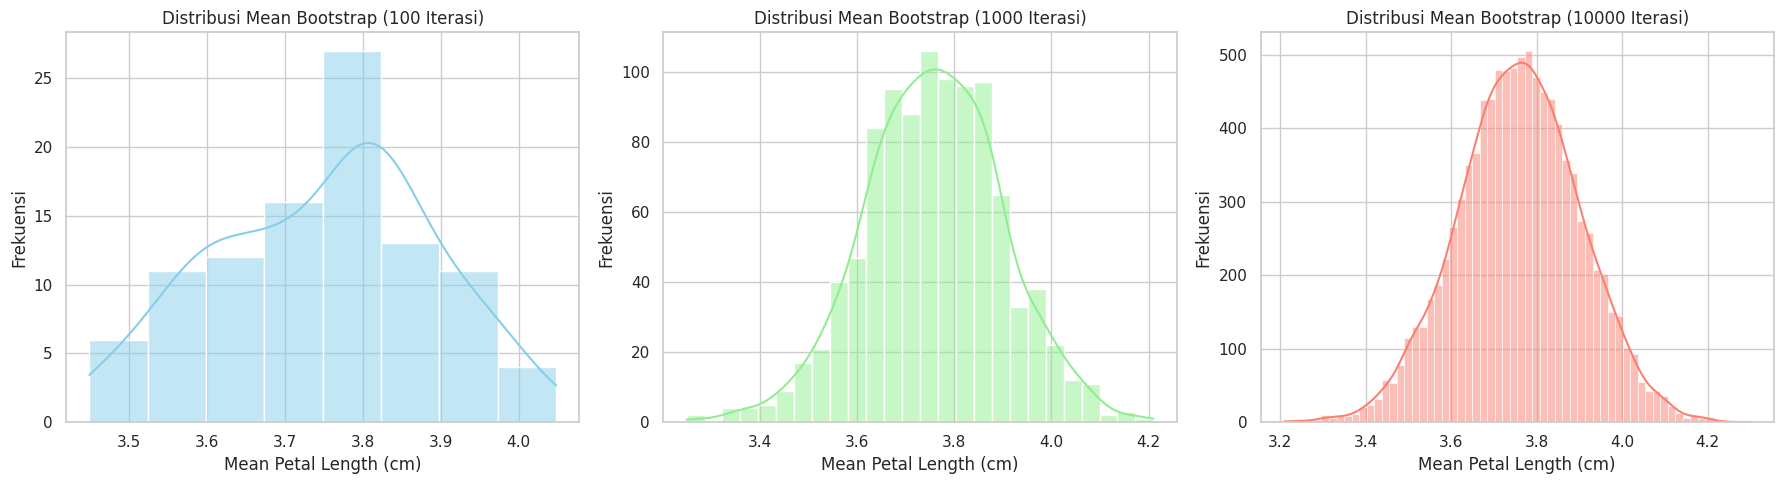

In [ ]:
# Visualisasi Histogram distribusi mean bootstrap
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(means_100, kde=True, color='skyblue')
plt.title('Distribusi Mean Bootstrap (100 Iterasi)')
plt.xlabel('Mean Petal Length (cm)')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
sns.histplot(means_1000, kde=True, color='lightgreen')
plt.title('Distribusi Mean Bootstrap (1000 Iterasi)')
plt.xlabel('Mean Petal Length (cm)')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
sns.histplot(means_10000, kde=True, color='salmon')
plt.title('Distribusi Mean Bootstrap (10000 Iterasi)')
plt.xlabel('Mean Petal Length (cm)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

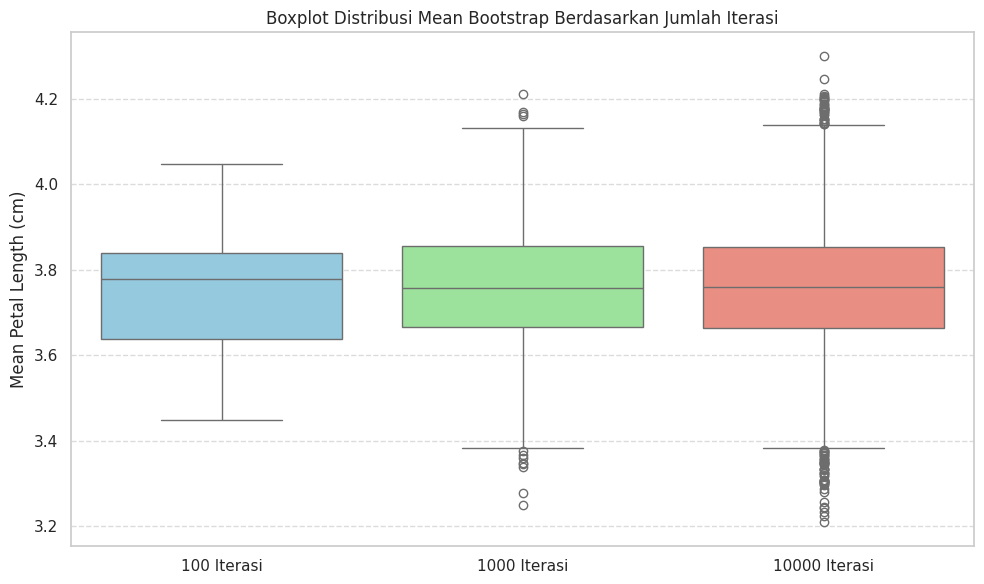

In [ ]:
# Visualisasi Boxplot distribusi mean bootstrap
plt.figure(figsize=(10, 6))
sns.boxplot(data=[means_100, means_1000, means_10000], palette=['skyblue', 'lightgreen', 'salmon'])
plt.xticks(ticks=[0, 1, 2], labels=['100 Iterasi', '1000 Iterasi', '10000 Iterasi'])
plt.title('Boxplot Distribusi Mean Bootstrap Berdasarkan Jumlah Iterasi')
plt.ylabel('Mean Petal Length (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
print("\n・○・● Interval Kepercayaan 95% ●・○・")
for m, iter_count in zip([means_100, means_1000, means_10000], [100, 1000, 10000]):
    lower = np.percentile(m, 2.5)
    upper = np.percentile(m, 97.5)
    print(f"Bootstrap {iter_count:5}: [{lower:.4f}, {upper:.4f}]")


・○・● Interval Kepercayaan 95% ●・○・
Bootstrap   100: [3.4821, 3.9946]
Bootstrap  1000: [3.4720, 4.0374]
Bootstrap 10000: [3.4753, 4.0340]


# **C. Perbandingan dan Analisis**

1. **Apakah mean bootstrap mendekati mean data asli?**

    Jawab: iya, melalui eksperimen yang kita lakukan pada dataset Iris, terlihat bahwa mean yang dihasilkan dari proses bootstrap hampir identik dengan rata-rata data aslinya.

2. **Bagaimana perubahasan distribusi saat jumlah bootstrap bertambah?**

    Jawab: seiring bertambahnya jumlah bootstrap dari 100 hingga 10.000 iterasi, distribusi mean akan mengalami perubahan bentuk secara signifikan menjadi lebih halus, lebih simetris, dan semakin menyerupai kurva lonceng yang sempurna sesuai dengan prinsip central limit theorem . pada jumlah iterasi yang kecil, grafik histogram cenderung terlihat "kasar" atau bergerigi karena keterbatasan data, namun pada 10.000 iterasi, sebaran data menjadi jauh lebih stabil dan memusat secara presisi di sekitar nilai rata-rata data asli . hal ini membuktikan bahwa penambahan jumlah bootstrap efektif untuk mengurangi variansi simulasi dan menghasilkan estimasi interval kepercayaan yang lebih konsisten serta akurat bagi analisis data.

3. **Mana yang lebih stabil: 100, 1000, atau 10000?**

    Jawab: dari eksperimen yang udah kita jalankan, 10.000 iterasi adalah pilihan paling stabil karena variansinya rendah (hasilnya konsisten walau kode dijalankan berulang), distribusinya lebih mulus mendekati kurva normal, dan interval kepercayaan 95%-nya jauh lebih akurat untuk estimasi nilai populasi, berbeda dengan 100 iterasi yang masih fluktuatif dan rentan faktor kebetulan.

4. **Apakah mean asli berada dalam interval kepercayaan?**

    Jawab: iya, mean asli ada di dalam interval kepercayaan tersebut.

    Sesuai hasil hitungan tadi, mean asli datanya adalah 3.7580, dan berdasarkan 10.000 iterasi bootstrap, interval kepercayaan 95%-nya berada di rentang 3.47 sampai 4.03, artinya kita cukup yakin bahwa metode sampling yang dipakai sudah akurat untuk menebak kondisi data aslinya.

5. **Mengapa satu data bisa muncul berkali-kali pada bootstrap?**

    Jawab: satu data bisa muncul berkali-kali dalam bootstrap karena metode ini menggunakan prinsip sampling with replacement. artinya, setiap kali kita ambil satu sampel dari data asli, data tersebut "dicatat" lalu "dikembalikan" lagi ke dalam populasi sebelum pengambilan berikutnya. jadi, data yang sama punya kesempatan buat terpilih lagi di iterasi berikutnya, bahkan bisa muncul beberapa kali dalam satu sampel bootstrap. justru di situlah letak fitur utama bootstrap. dengan membiarkan adanya duplikasi, kita bisa mensimulasikan variasi acak dari populasi dan memperkirakan seberapa stabil statistik kita. seperti mean atau median—tanpa perlu repot mengumpulkan data baru.

# **D. Kesimpulan**

1.  **Insight utama dari EDA dataset Iris**

    Jawab:
    Dataset Iris terdiri dari 150 sampel bunga yang terbagi rata ke dalam tiga spesies, yaitu setosa, versicolor, dan virginica, dengan masing-masing 50 data. Variabel yang dianalisis mencakup sepal length, sepal width, petal length, dan petal width.
    
    Hasil eksplorasi menunjukkan beberapa insight, di antaranya:
    1. Petal length dan petal width merupakan fitur paling kuat untuk membedakan ketiga spesies.
    2. Setosa terpisah sangat jelas dari dua spesies lainnya berdasarkan ukuran petal yang kecil dan konsisten.
    3. Versicolor dan virginica memang sedikit tumpang tindih jika dilihat dari variabel sepal, namun keduanya jauh lebih terpisah ketika menggunakan variabel petal.
    4. Terdapat korelasi positif yang kuat antara petal length dan petal width, yang berarti kedua variabel ini cenderung bergerak seiring.
    5. Sepal width memiliki variasi yang lebih besar sehingga kurang efektif jika digunakan sebagai satu-satunya fitur untuk klasifikasi.

2.  **Karakteristik tiap spesies (berdasarkan visualisasi)**

    * Iris setosa: Setosa memiliki petal length paling kecil dengan rata-rata sekitar 1.4 cm, serta petal width yang sangat kecil dengan rata-rata sekitar 0.2 cm. Sebaran datanya rapat dan konsisten, sehingga spesies ini terpisah sangat jelas pada scatter plot petal.
    * Iris versicolor: Versicolor berada di kategori menengah dengan petal length rata-rata sekitar 4.3 cm dan petal width sekitar 1.3 cm. Distribusinya lebih menyebar dibanding setosa, dan pada beberapa bagian mulai terlihat tumpang tindih dengan virginica.
    * Iris virginica: Virginica mencatat ukuran petal length paling besar dengan rata-rata sekitar 5.5 cm, serta petal width terbesar dengan rata-rata sekitar 2.0 cm. Spesies ini memiliki variasi yang cukup besar dan secara visual menempati area paling kanan atas pada scatter plot petal.

3.  **Manfaat bootstrap dalam analisis data**

    Bootstrap adalah teknik resampling yang bekerja dengan cara mengambil sampel ulang secara acak dari data asli. Manfaatnya antara lain:
    * Mengestimasi standar error tanpa perlu asumsi distribusi normal
    * Menghitung confidence interval dengan lebih fleksibel
    * Sangat cocok untuk ukuran sampel yang kecil
    * Membantu mengukur stabilitas statistik atau model yang dibangun
    * Bisa digunakan untuk evaluasi akurasi model klasifikasi
    * Semua manfaat tersebut bisa diperoleh hanya dengan memanfaatkan data yang sudah tersedia
4.  **Jumlah bootstrap yang menurut Anda cukup**

    * 100 sampai 500 cukup untuk eksplorasi awal.
    * 1000 umum digunakan dalam penelitian.
    * 5000 atau lebih cocok jika ingin estimasi interval yang lebih stabil.
    
    Untuk dataset Iris dengan 150 data, 1000 bootstrap sudah cukup untuk estimasi mean atau confidence interval yang stabil.
